In [ ]:
#Importing libraries


In [143]:
import numpy as np

import pandas as pd

import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_regression

from feature_engine.datetime import DatetimeFeatures

from xgboost import XGBRegressor

import joblib

import matplotlib.pyplot as plt

In [ ]:
#Display Settings

In [105]:
pd.set_option("display.max_columns", None)

In [106]:
sklearn.set_config(transform_output="pandas")

In [ ]:
#Getting data

In [107]:
train_data=pd.read_csv("data/train.csv")
test_data=pd.read_csv("data/test.csv")
sample_data=pd.read_csv("data/sampsub.csv")


In [109]:
pd.read_csv("data/train.csv")



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
#Split data

In [26]:
def split_data(data):
    x = data.drop(columns="Item_Type")
    y = data["Item_Type"]
    return x, y

# Example usage
#

    

In [27]:
X_train, Y_train = split_data(train_data)

In [28]:
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [32]:
X_test,Y_test=split_data(test_data)

In [33]:
Y_test

0              Snack Foods
1                    Dairy
2                   Others
3              Snack Foods
4                    Dairy
               ...        
5676           Snack Foods
5677         Starchy Foods
5678    Health and Hygiene
5679                Canned
5680                Canned
Name: Item_Type, Length: 5681, dtype: object

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
#Data preprocessing#


In [36]:
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
categorical_columns = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
datetime_columns = ['Outlet_Establishment_Year']
cat_cols=[col for col in X_train.columns if(col not in datetime_columns) and(col not in categorical_columns) and (col not in numeric_columns)]
          


In [57]:
datetime_columns

['Outlet_Establishment_Year']

In [100]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_transformer= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most frequent")),
    ("encoder", OneHotEncoder(sparse_output=False))
])
#doj_transformer= Pipeline(steps=[
   # ("imputer", SimpleImputer(strategy="most frequent")),
   # ("extractor", DatetimeFeatures(feature_to_extract=["month","week","day_of_week","day_of_month"],format="mixed")),
   #   ("scaler", StandardScaler())
#])
time_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	
	("scaler", StandardScaler())
])


In [110]:
preprocessor = ColumnTransformer(transformers=[
	("num", num_transformer, numeric_columns),
	("cat", cat_transformer, categorical_columns),
    ("datetime", time_transformer, datetime_columns)
])


In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Example preprocessor setup
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
categorical_features = ['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [121]:
# Check data types
print(Y_train.dtypes)


object


In [144]:
X_data, y_data = make_regression(n_samples=1000, n_features=20, noise=0.1)
preprocessor = StandardScaler()

In [ ]:
#Model Selection#


In [125]:
algorithms = {
	"Linear Regression": LinearRegression(),
	"Support Vector Machine": SVR(),
	"Random Forest": RandomForestRegressor(n_estimators=10),
	"XG Boost": XGBRegressor(n_estimators=10)
}

In [126]:
data = pd.concat([train_data, test_data], axis=0)

X_data, y_data = split_data(data)
print(X_data.shape, y_data.shape)

(14204, 11) (14204,)


In [132]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [138]:
def plot_curves(train_sizes, mean_scores, std_scores, label, ax):
	ax.plot(train_sizes, mean_scores, 'o-', label=label)
	ax.fill_between(train_sizes, mean_scores - std_scores, mean_scores + std_scores, alpha=0.1)

def plot_learning_curves(name, algorithm, X_data, y_data, preprocessor, figsize=(12, 4)):
	"""
	Plot learning curves for a given algorithm with preprocessing.
	
	Parameters:
	name (str): The title of the plot.
	algorithm: The machine learning algorithm to evaluate.
	X_data (array-like): The input data to fit.
	y_data (array-like): The target variable to predict.
	preprocessor: The preprocessing steps to apply.
	figsize (tuple): The size of the plot.

	Returns:
	None
	"""
	model = Pipeline(steps=[
		("pre", preprocessor),
		("alg", algorithm)
	])

	train_sizes, train_scores, test_scores = learning_curve(
		estimator=model,
		X=X_data,
		y=y_data,
		cv=3,
		scoring="r2",
		n_jobs=-1,
		train_sizes=np.linspace(0.1, 1.0, 5),
		random_state=42
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

	ax.legend(loc="lower right")

	plt.show()

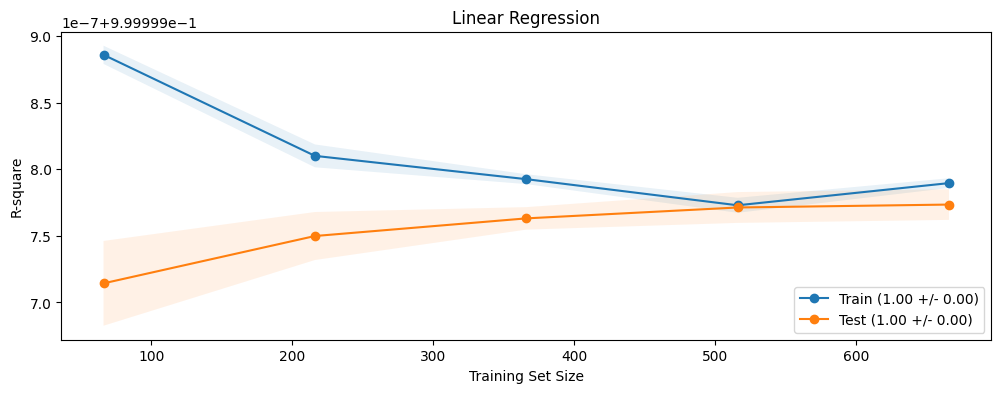

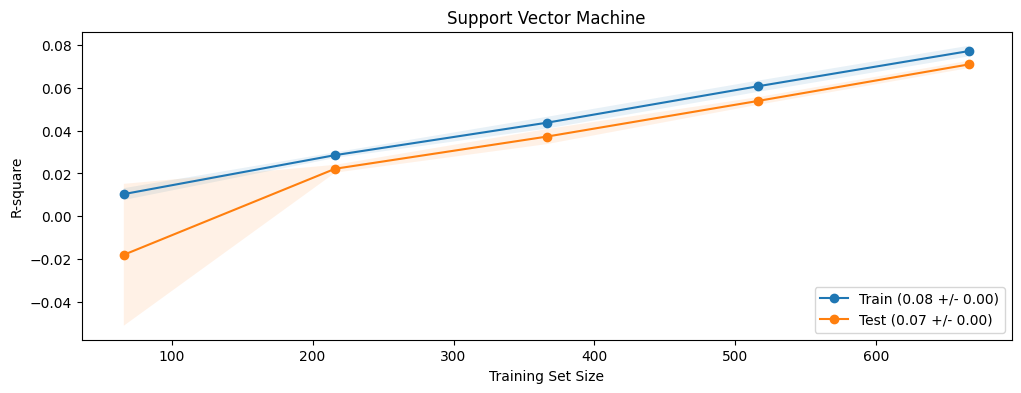

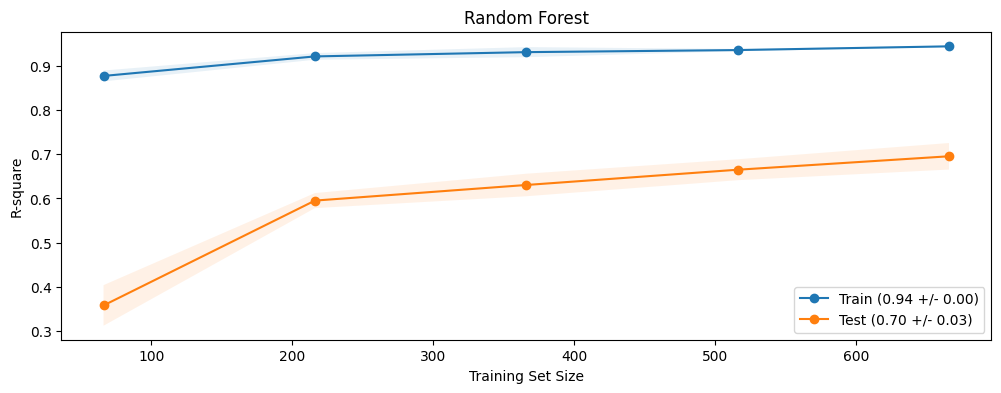

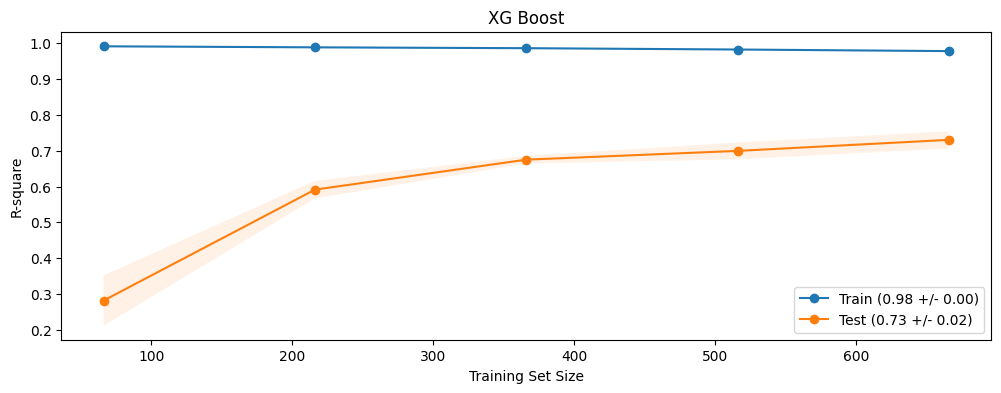

In [146]:
for name, alg in algorithms.items():
    plot_learning_curves(name, alg, X_data, y_data, preprocessor)

In [147]:
model = Pipeline(steps=[
	("pre", preprocessor),
	("rf", RandomForestRegressor(n_estimators=10))
])

In [148]:
model.fit(X_data, y_data)

Pipeline(steps=[('pre', StandardScaler()),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Define the transformers
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

time_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("scaler", StandardScaler())
])

# Define the column transformer
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, ['duration', 'total_stops']),
    ("cat", cat_transformer, ['airline', 'source', 'destination', 'additional_info']),
    ("datetime", time_transformer, ['dep_time', 'arrival_time'])
])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=10))
])

# Example of fitting the pipeline to data
# pipeline.fit(X_train, y_train)


In [165]:
def evaluate_model(X, y):
	y_pred = model.predict(X)
	return r2_score(y, y_pred)

In [166]:
print(f"R2 score on Training data is = {evaluate_model(X_data, y_data)}")

R2 score on Training data is = -0.10460593745396363


In [169]:
print(f"R2 score on Test data is = {evaluate_model(X_test, y_test)}")

NameError: name 'y_test' is not defined